# **學習歷程資料分析及應用**
將檔案下載後upload到colab上
* **程式碼與課程資料：**https://drive.google.com/file/d/1AK6VYgNVpzr999t7KYjkL4dx8gMwjIPs/view?usp=sharing

* **課程投影片**：https://docs.google.com/presentation/d/16V2t0VhX0pTaQ5hjjad8vM_6wvbS_yPhnr8oNZyaREE/edit?usp=sharing

* **OpenEdu 課程**：https://studio.openedu.tw/course/course-v1:OpenEdu+T+19001

* **PyOpenEdu API 文件**: https://docs.google.com/document/d/18cLRBDX-zoVrbMl_x-GiEpDOYHksPC_SA4lV-aIyeLc/edit#

# 一、Colab 環境設定與套件匯入


## Colab 更新套件
如果不是使用 colab 則可忽略此步驟

colab 本身 pyyaml 套件版本過於老舊，所以將其更新到 5.2 版以上

In [0]:
import yaml

yaml.__version__

'5.3'

In [0]:
%pip install --upgrade pyyaml

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3-cp36-cp36m-linux_x86_64.whl size=44229 sha256=77b8a8b1ac4f4e1cb9e4da5f021c6bcf0c453f13864fd0f05139dfbab65f6e65
  Stored in directory: /root/.cache/pip/wheels/e4/76/4d/a95b8dd7b452b69e8ed4f68b69e1b55e12c9c9624dd962b191
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## 解壓縮套件

In [0]:
import zipfile
with zipfile.ZipFile("/content/PyOpenEdu.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

為了方便使用套件找到套件位置，未來能讓 OpenEdu 套件透過 pip install PyOpenEdu 安裝套件

In [0]:
%cd /content/PyOpenEdu/
!pwd
!ls

/content/PyOpenEdu
/content/PyOpenEdu
¼÷┐².txt		  Descriptive_analysis.py  Predictive_analysis.py
Analysis.py		  Diagnostic_analysis.py   __pycache__
Config.py		  Export.py		   PyOpenEdu.py
config.yaml		  filter_data.py	   Student_behavior.py
Course_Initialization.py  Loader.py		   Visualization.py
Course.py		  Normative_analysis.py
Data.py			  openedu_base.py


## 匯入套件

In [0]:
import pandas as pd
import numpy as np
from PyOpenEdu import OpenEdu
import yaml

yaml.__version__

'5.3'

# 二、資料處理的基礎 : Pandas

##a. 讀取檔案與顯示欄位

*   pd.read_csv() 是 pandas 中用來讀取 csv 格式檔案用的方法
*   .colums 指的是將資料表欄位名稱印出來
*   .info()可以看到所有資料表欄位的型態


In [0]:
table = pd.read_csv("/content/analysis_data.csv")
table.columns

Index(['user_id', 'video_watch_count', 'video_complete_rate', 'login_count',
       'video_watch_time', 'attempts_sum', 'problem_grade_sum',
       'complete_problem_number'],
      dtype='object')

In [0]:
# 顯示欄位型態
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
user_id                    101 non-null int64
video_watch_count          101 non-null int64
video_complete_rate        101 non-null float64
login_count                101 non-null int64
video_watch_time           101 non-null float64
attempts_sum               101 non-null float64
problem_grade_sum          101 non-null float64
complete_problem_number    101 non-null int64
dtypes: float64(4), int64(4)
memory usage: 6.4 KB


colab 是基於 jupyter 建立的環境，正常編譯環境需要透過 print() 方式

In [0]:
table

,user_id,video_watch_count,video_complete_rate,login_count,video_watch_time,attempts_sum,problem_grade_sum,complete_problem_number
0,27,11,0.105769,9,101.582932,2.0,1.0,1
1,7265,8,0.076923,5,707.206701,7.0,11.0,7
2,29199,33,0.317308,4,14942.576056,75.0,93.0,57
3,30862,13,0.125000,3,2752.492404,14.0,14.0,12
4,31075,14,0.134615,2,1244.190222,2.0,2.0,2
...,...,...,...,...,...,...,...,...
96,75277,10,0.096154,5,3525.905487,16.0,18.0,12
97,75353,6,0.057692,2,2538.162724,0.0,0.0,0
98,75489,2,0.019231,6,1147.487172,2.0,2.0,2
99,76406,0,0.000000,7,0.000000,0.0,0.0,0


##b. 挑選資料表欄位

In [0]:
# 挑選資料欄位
table_filter = table[["login_count"]]
table_filter

,login_count
0,9
1,5
2,4
3,3
4,2
...,...
96,5
97,2
98,6
99,7


### Lab 1 : 挑選欄位 
用上面的 table 資料表挑出 video_watch_count、video_complete_rate、video_watch_time 欄位

In [0]:
# Please write your code here
table[['video_watch_count', 'video_complete_rate', 'video_watch_time']]


,video_watch_count,video_complete_rate,video_watch_time
0,3,0.081081,10.275000
1,0,0.000000,0.000000
2,5,0.135135,53.400948
3,11,0.297297,440.207353
4,6,0.162162,1258.253301
...,...,...,...
121,4,0.108108,17.451664
122,0,0.000000,0.000000
123,0,0.000000,0.000000
124,0,0.000000,0.000000


## c. 計算資料數量

In [0]:
table_filter.count()

login_count    101
user_id        101
dtype: int64

##d. 計算資料總和

In [0]:
table_filter.sum()

login_count    276
dtype: int64

##e. 計算資料平均

In [0]:
table_filter.mean()

login_count    2.732673
dtype: float64

### Lab 2 : 同上，找出最大最小以及中位數

In [0]:
# Please write your code here
table_filter.min()
table_filter.max()
table_filter.median()


login_count    2.0
dtype: float64

##f. 觀看影片長度介於 100~1000 秒間的資料

In [0]:
table_filter = table[table.video_watch_time >= 100]
table_filter[table_filter.video_watch_time <= 1000]

,user_id,video_watch_count,video_complete_rate,login_count,video_watch_time,attempts_sum,problem_grade_sum,complete_problem_number
0,27,11,0.105769,9,101.582932,2.0,1.0,1
1,7265,8,0.076923,5,707.206701,7.0,11.0,7
29,61147,4,0.038462,1,873.886468,3.0,5.0,3
35,64047,5,0.048077,1,914.587815,6.0,6.0,4
36,64630,5,0.048077,1,394.658754,0.0,0.0,0
37,64931,33,0.317308,2,166.441558,0.0,0.0,0
39,65296,3,0.028846,1,441.458908,0.0,0.0,0
43,65426,8,0.076923,1,158.810474,0.0,0.0,0
44,65443,10,0.096154,1,896.824806,1.0,4.0,1
45,65461,1,0.009615,1,178.566778,0.0,0.0,0


### Lab 3 : 列出至少答對一題題目的學生資料

*   complete_problem_number : 答對題數



In [0]:
# Please write your code here

table[table.complete_problem_number > 0]


,user_id,video_watch_count,video_complete_rate,login_count,video_watch_time,attempts_sum,problem_grade_sum,complete_problem_number
0,27,11,0.105769,9,101.582932,2.0,1.0,1
1,7265,8,0.076923,5,707.206701,7.0,11.0,7
2,29199,33,0.317308,4,14942.576056,75.0,93.0,57
3,30862,13,0.125000,3,2752.492404,14.0,14.0,12
4,31075,14,0.134615,2,1244.190222,2.0,2.0,2
6,34845,8,0.076923,2,2458.910208,20.0,24.0,17
12,41666,10,0.096154,4,2625.893623,9.0,9.0,7
13,42860,19,0.182692,4,8227.903253,41.0,59.0,35
15,50358,14,0.134615,5,5308.240608,17.0,19.0,14
16,50438,9,0.086538,2,2255.307327,12.0,17.0,12


# 三、Log, grade, and survey


## OpenEdu 與 Course 物件

In [0]:
# 建立一個 OpenEdu 物件
openedu = OpenEdu()

* 建立課程
* 課程名稱 G38
* 初始化課程
* 這裡會將 Hello Python 這門課的資料初始化，而初始化是依據課程已擁有的資料先做資料前處理



In [0]:
# 參數內指定存放資料夾的位置
# 現在位置在 openedu 資料夾內，所以設定 ".." 來取上一層存放資料位置，並初始化課程。
# 建立課程
G38 = openedu.import_course("..")

# 請觀察初始化的內容

start to initialization of path.
*******************************開始初始化*********************************
../student_grade.csv
load student_grade.csv finish
student_pass.csv processing completed.
****************************************************************


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/content/PyOpenEdu/Course_Initialization.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grade_data['target'] = grade_data.apply(self.DataProcess.get_pass, axis=1)


unzip was finish
Processing the 2019-01-01 log
Processing the 2019-01-08 log
Processing the 2019-01-14 log


/content/PyOpenEdu/Loader.py:99: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  origin_log_data = pd.concat([origin_log_data, temp], axis = 0, ignore_index = True)


Processing the 2019-01-22 log
Processing the 2019-01-29 log
Processing the 2019-02-04 log
Processing the 2019-02-12 log
Processing the 2019-02-19 log
Processing the 2019-02-26 log
Processing the 2019-03-26 log
Processing the 2019-03-29 log
Processing the 2019-04-16 log
Processing the 2019-04-23 log
Processing the 2019-04-30 log
Processing the 2019-05-07 log
Processing the 2019-05-14 log
Processing the 2019-05-21 log
Processing the 2019-05-28 log
Processing the 2019-06-04 log
Processing the 2019-06-11 log
Processing the 2019-06-18 log
Processing the 2019-06-25 log
Processing the 2019-07-01 log
Processing the 2019-07-16 log
Processing the 2019-07-23 log
Processing the 2019-07-28 log
Processing the 2019-08-06 log
Processing the 2019-08-13 log
Processing the 2019-08-20 log
Processing the 2019-09-16 log
Processing the 2019-09-30 log
Processing the 2019-10-09 log
Processing the 2019-10-16 log
Processing the 2019-10-23 log
load_all_log was finish
log_data.csv processing completed.
***********

## t_log

In [0]:
t_log = G38.get_log()
t_log.head(3)

../log_data.csv
load log_data.csv finish


,Unnamed: 0,accept_language,agent,context,event,event_source,event_type,host,ip,name,page,referer,session,time,username
0,0,"zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,"{'course_user_tags': {}, 'user_id': 58782, 'or...","{""POST"": {}, ""GET"": {}}",server,/courses/course-v1:FCUx+QA76+18010/info,courses.openedu.tw,36.234.12.202,NaN,NaN,https://courses.openedu.tw/dashboard,NaN,2018-12-28T06:18:44.916615+00:00,lucascheng
1,1,"zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,"{'course_user_tags': {}, 'user_id': 58782, 'or...","{""POST"": {}, ""GET"": {}}",server,/courses/course-v1:FCUx+QA76+18010/course/,courses.openedu.tw,36.234.12.202,NaN,NaN,https://courses.openedu.tw/courses/course-v1:F...,NaN,2018-12-28T06:18:49.716151+00:00,lucascheng
2,2,"zh-TW,zh;q=0.9,en-US;q=0.8,en;q=0.7",Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,"{'course_user_tags': {}, 'user_id': 58782, 'or...","{""POST"": {}, ""GET"": {}}",server,/courses/course-v1:FCUx+QA76+18010/jump_to/blo...,courses.openedu.tw,36.234.12.202,NaN,NaN,https://courses.openedu.tw/courses/course-v1:F...,NaN,2018-12-28T06:18:57.503845+00:00,lucascheng


## t_clean_log

In [0]:
t_clean_data = G38.get_clean_data()
t_clean_data.head(3)

../clean_data.csv
load clean_data.csv finish


,user_id,course_id,event_source,event_type,code,session,date,currentTime,old_time,new_time,old_speed,new_speed,problem_id,attempts,grade,max_grade,success
0,58782,course-v1:FCUx+QA76+18010,browser,edx.ui.lms.link_clicked,NaN,361df8da4963f4fa54a56cc7e6c5e79e,2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,58782,course-v1:FCUx+QA76+18010,browser,load_video,35D-mYlXDTI,361df8da4963f4fa54a56cc7e6c5e79e,2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,58782,course-v1:FCUx+QA76+18010,browser,page_close,NaN,361df8da4963f4fa54a56cc7e6c5e79e,2018-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## t_grade

In [0]:
t_grade = G38.get_grade()
t_grade

../student_grade.csv
load student_grade.csv finish


,Student ID,Grade,Quiz in video 1: 1.2 Python,Quiz in video 2: 1.3 工具的安裝與使用,Quiz in video 3: 4.1 有順序、可修改的集合資料- List,Quiz in video 4: 4.2 不可修改的集合資料- Tuple,Quiz in video 5: 4.3 沒有順序、不可重複的集合資料- Set,Quiz in video 6: 4.4 由 key-value 所構成的集合資料- Dictionary,Quiz in video 7: 5.1 函式,Quiz in video 8: 5.2 參數的傳遞,Quiz in video 9: 5.3 Lambda 函式,Quiz in video 10: 5.4 例外處理,Quiz in video (Avg),Self Test 1: 1.t 綜合整理與測驗,Self Test 2: 2.t 綜合整理與測驗,Self Test 3: 3.t 綜合整理與測驗,Self Test 4: 4.t 綜合整理與練習,Self Test 5: 5.t 綜合整理與練習,Self Test (Avg),Exercise 1: 1.x Exercise,Exercise 2: 2.x Coding Exercise,Exercise 3: 3.x Coding Exercise,Exercise 4: 5.x Coding Exercise,Exercise 5: 6.1 課程期末專案,Exercise (Avg),Cohort Name,Enrollment Track,Verification Status,Certificate Eligible,Certificate Delivered,Certificate Type,Enrollment Status
0,34468,0.10,Not Attempted,0.5,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.050,0.67,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.134,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,預設群組,audit,NaN,N,N,NaN,enrolled
1,27,0.79,1.0,1.0,1.0,0.67,1.0,1.0,1.0,1.0,1.0,Not Attempted,0.867,1.0,1.0,1.0,0.75,1.0,0.950,0.33,0.5,Not Attempted,Not Attempted,Not Attempted,0.166,預設群組,audit,NaN,N,N,NaN,enrolled
2,56472,0.16,1.0,0.5,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.150,0.67,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.134,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.200,預設群組,audit,NaN,N,N,NaN,enrolled
3,55150,0.14,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.200,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,預設群組,audit,NaN,N,N,NaN,enrolled
4,50029,0.00,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,預設群組,audit,NaN,N,N,NaN,enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1721,76813,0.00,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,預設群組,audit,NaN,N,N,NaN,enrolled
1722,61049,0.20,Not Attempted,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.100,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.200,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.200,預設群組,audit,NaN,N,N,NaN,enrolled
1723,77102,0.00,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,預設群組,audit,NaN,N,N,NaN,enrolled
1724,77068,0.01,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.100,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,預設群組,audit,NaN,N,N,NaN,enrolled


In [0]:
# 是否通過課程
t_passOrNot = G38.pass_or_not()
t_passOrNot

../student_pass.csv
load student_pass.csv finish


,user_id,target
0,16,False
1,27,True
2,28,False
3,88,False
4,113,False
...,...,...
1721,76954,False
1722,76991,False
1723,77008,False
1724,77068,False


###Lab 4 : 輸出成績
讀取學生成績資料，挑選以下欄位並印出 Student ID、Quiz in video (Avg)、Self Test (Avg)、Exercise (Avg)

In [0]:
# Please write your code here
mask_list = ["Student ID", "Quiz in video (Avg)", "Self Test (Avg)"
            , "Exercise (Avg)"]
t_grade[mask_list]

,Student ID,Quiz in video (Avg),Self Test (Avg),Exercise (Avg)
0,34468,0.050,0.134,0.000
1,27,0.867,0.950,0.166
2,56472,0.150,0.134,0.200
3,55150,0.000,0.200,0.000
4,50029,0.000,0.000,0.000
...,...,...,...,...
1721,76813,0.000,0.000,0.000
1722,61049,0.100,0.200,0.200
1723,77102,0.000,0.000,0.000
1724,77068,0.100,0.000,0.000


###Lab 5 : 調整成績的範圍為 0.3 ~ 0.7 之間並觀察結果

In [0]:
# Please write your code here
grade_range = t_grade[t_grade.Grade >= 0.3]
grade_range[grade_range.Grade <= 0.7]


,Student ID,Grade,Quiz in video 1: 1.2 Python,Quiz in video 2: 1.3 工具的安裝與使用,Quiz in video 3: 4.1 有順序、可修改的集合資料- List,Quiz in video 4: 4.2 不可修改的集合資料- Tuple,Quiz in video 5: 4.3 沒有順序、不可重複的集合資料- Set,Quiz in video 6: 4.4 由 key-value 所構成的集合資料- Dictionary,Quiz in video 7: 5.1 函式,Quiz in video 8: 5.2 參數的傳遞,Quiz in video 9: 5.3 Lambda 函式,Quiz in video 10: 5.4 例外處理,Quiz in video (Avg),Self Test 1: 1.t 綜合整理與測驗,Self Test 2: 2.t 綜合整理與測驗,Self Test 3: 3.t 綜合整理與測驗,Self Test 4: 4.t 綜合整理與練習,Self Test 5: 5.t 綜合整理與練習,Self Test (Avg),Exercise 1: 1.x Exercise,Exercise 2: 2.x Coding Exercise,Exercise 3: 3.x Coding Exercise,Exercise 4: 5.x Coding Exercise,Exercise 5: 6.1 課程期末專案,Exercise (Avg),Cohort Name,Enrollment Track,Verification Status,Certificate Eligible,Certificate Delivered,Certificate Type,Enrollment Status
13,56938,0.41,Not Attempted,Not Attempted,0.58,0.67,0.8,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.205,1.0,1.0,0.8,Not Attempted,Not Attempted,0.560,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.0,預設群組,audit,NaN,N,N,NaN,enrolled
18,53623,0.39,Not Attempted,Not Attempted,0.58,0.67,0.8,0.75,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.280,1.0,0.88,0.7,Not Attempted,Not Attempted,0.516,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.0,預設群組,audit,NaN,N,N,NaN,unenrolled
30,57074,0.41,Not Attempted,Not Attempted,0.5,0.67,1.0,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.317,0.67,1.0,1.0,Not Attempted,Not Attempted,0.534,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.0,預設群組,audit,NaN,N,N,NaN,enrolled
42,57154,0.49,Not Attempted,0.0,0.5,Not Attempted,Not Attempted,Not Attempted,1.0,1.0,0.8,1.0,0.430,1.0,0.62,0.7,Not Attempted,0.86,0.636,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.0,預設群組,audit,NaN,N,N,NaN,enrolled
44,41803,0.41,Not Attempted,Not Attempted,0.2,Not Attempted,Not Attempted,Not Attempted,0.17,Not Attempted,0.2,Not Attempted,0.057,1.0,1.0,0.9,Not Attempted,Not Attempted,0.580,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.0,預設群組,audit,NaN,N,N,NaN,enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1653,76318,0.33,1.0,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.200,1.0,0.88,Not Attempted,Not Attempted,Not Attempted,0.376,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.2,預設群組,audit,NaN,N,N,NaN,enrolled
1669,76406,0.33,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.000,1.0,1.0,Not Attempted,Not Attempted,Not Attempted,0.400,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.2,預設群組,audit,NaN,N,N,NaN,enrolled
1675,76448,0.31,1.0,0.5,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.150,1.0,0.75,Not Attempted,Not Attempted,Not Attempted,0.350,1.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.2,預設群組,audit,NaN,N,N,NaN,enrolled
1676,74849,0.45,1.0,0.0,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,Not Attempted,0.100,1.0,0.88,0.2,Not Attempted,Not Attempted,0.416,1.0,1.0,1.0,Not Attempted,Not Attempted,0.6,預設群組,audit,NaN,N,N,NaN,enrolled


### Lab 6 : 學生通過課程比例為多少?

In [0]:
# Please write your code here
# 0.3 代表成績為 30 分以上的比例可更改為 0 ~ 1
G38.Analysis.GeneralAnalyzer.get_pass_rate(t_grade, 0.3)


0.11181923522595597

## t_survey

In [0]:
t_survey = G38.get_survey()
t_survey

../survey.csv
load survey.csv finish


,Student ID,Education,gender
0,16,高中,f
1,27,大學,f
2,28,高中,f
3,88,高中,m
4,113,大學,f
...,...,...,...
1721,76954,碩士,f
1722,76991,大學,f
1723,77008,大學,f
1724,77068,高中,f


In [0]:
# 依據教育程度分類，並計算每一群的數量
t_survey_gb = t_survey.groupby("Education").count()
t_survey_gb

,Student ID,gender
Education,,
大學,574,574
碩士,559,559
高中,593,593


# 四、StudentBehavior

In [0]:
# 透過 G38.get_clean_data() 整理出的資訊，並加以做一些分析得到的新資訊
studentBehavior = G38.get_student_behavior()
studentBehavior.data

../analysis_data.csv
load analysis_data.csv finish


,user_id,video_watch_count,video_complete_rate,login_count,video_watch_time,attempts_sum,problem_grade_sum,complete_problem_number
0,27,11,0.105769,9,101.582932,2.0,1.0,1
1,7265,8,0.076923,5,707.206701,7.0,11.0,7
2,29199,33,0.317308,4,14942.576056,75.0,93.0,57
3,30862,13,0.125000,3,2752.492404,14.0,14.0,12
4,31075,14,0.134615,2,1244.190222,2.0,2.0,2
...,...,...,...,...,...,...,...,...
96,75277,10,0.096154,5,3525.905487,16.0,18.0,12
97,75353,6,0.057692,2,2538.162724,0.0,0.0,0
98,75489,2,0.019231,6,1147.487172,2.0,2.0,2
99,76406,0,0.000000,7,0.000000,0.0,0.0,0


### 加入 t_grade, t_survey, t_pass_or_not

In [0]:
#更改 t_survey 和 t_grade 的欄位 StudentID 名稱為user_id
t_grade_rename = openedu.rename_columns(t_grade[["Student ID","Grade"]], {'Student ID':'user_id'})
t_grade_rename.user_id = t_grade_rename.user_id.astype('str')

# 將 t_grade 加入 studentBehavior.data
# add_grade 中 0 將空白處補 0，1 將空白整列拿除
studentBehavior.add_grade(t_grade_rename, 1)

# 將 t_survey 加入 studentBehavior.data
t_survey_rename = openedu.rename_columns(t_survey, {'Student ID':'user_id'})
t_survey_rename.user_id = t_survey_rename.user_id.astype('str')
studentBehavior.add_survey(t_survey_rename)

# 將 t_test 加入 studentBehavior.data
# pass_grade : 通過成績門檻
# state 0 回傳 boolean ， state = 1 回傳通過學生資料
t_test = studentBehavior.t_pass_or_not(pass_grade=0.6, state=0)
studentBehavior.add_test(t_test)



/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


###a. 顯示 studentBehavior.data

In [0]:
studentBehavior.data

,user_id,video_watch_count,video_complete_rate,login_count,video_watch_time,attempts_sum,problem_grade_sum,complete_problem_number,Grade,Education,gender,test
0,27,11,0.105769,9,101.582932,2.0,1.0,1,0.79,大學,f,True
1,7265,8,0.076923,5,707.206701,7.0,11.0,7,0.38,碩士,f,False
2,29199,33,0.317308,4,14942.576056,75.0,93.0,57,0.96,大學,m,True
3,30862,13,0.125000,3,2752.492404,14.0,14.0,12,0.16,大學,f,False
4,31075,14,0.134615,2,1244.190222,2.0,2.0,2,0.00,碩士,f,False
...,...,...,...,...,...,...,...,...,...,...,...,...
90,75007,4,0.038462,2,1087.000262,0.0,0.0,0,0.40,碩士,f,False
91,75277,10,0.096154,5,3525.905487,16.0,18.0,12,0.94,碩士,f,True
92,75353,6,0.057692,2,2538.162724,0.0,0.0,0,0.01,大學,f,False
93,75489,2,0.019231,6,1147.487172,2.0,2.0,2,0.02,高中,f,False


###b. 讀取學生登入的次數

In [0]:
# 每個學生登入的次數
studentBehavior.t_login()	

,user_id,login_count
0,27,9
1,7265,5
2,29199,4
3,30862,3
4,31075,2
...,...,...
90,75007,2
91,75277,5
92,75353,2
93,75489,6


###c. 讀取影片觀看統計資訊
*   video_watch_count : 計算影片觀看數量
*   video_complete_rate : 影片完看率
*   video_watch_time : 計算影片總觀看時間



In [0]:
studentBehavior.t_watch().round(2)

,user_id,video_watch_count,video_complete_rate,video_watch_time
0,27,11,0.11,101.58
1,7265,8,0.08,707.21
2,29199,33,0.32,14942.58
3,30862,13,0.12,2752.49
4,31075,14,0.13,1244.19
...,...,...,...,...
90,75007,4,0.04,1087.00
91,75277,10,0.10,3525.91
92,75353,6,0.06,2538.16
93,75489,2,0.02,1147.49


###d. 學生作答情況

*   attempts_sum : 作答次數
*   problem_grade_sum : 總分
*   complete_problem_number : 答對題數



In [0]:
# 作答次數，總分，答對題數
studentBehavior.t_answer()	

,user_id,attempts_sum,problem_grade_sum,complete_problem_number
0,27,2.0,1.0,1
1,7265,7.0,11.0,7
2,29199,75.0,93.0,57
3,30862,14.0,14.0,12
4,31075,2.0,2.0,2
...,...,...,...,...
90,75007,0.0,0.0,0
91,75277,16.0,18.0,12
92,75353,0.0,0.0,0
93,75489,2.0,2.0,2


###e. 基本資料操作

In [0]:
studentBehavior.data.describe().round(2)
# 也可以只抓一個值
# studentBehavior.data.mean()
# studentBehavior.data.count()
# studentBehavior.data.max()

,video_watch_count,video_complete_rate,login_count,video_watch_time,attempts_sum,problem_grade_sum,complete_problem_number,Grade
count,95.00,95.00,95.00,95.00,95.00,95.00,95.00,95.00
mean,7.72,0.07,2.78,2168.48,115.94,17.94,9.00,0.31
std,7.79,0.07,2.77,3043.94,1044.70,80.41,25.91,0.31
min,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,2.00,0.02,1.00,45.30,0.00,0.00,0.00,0.02
50%,5.00,0.05,2.00,896.82,1.00,1.00,1.00,0.24
75%,12.00,0.12,4.00,2767.25,10.50,11.50,8.00,0.48
max,33.00,0.32,19.00,14942.58,10190.00,773.00,232.00,0.98


## Lab 7 : 影片觀看與成績之關係

### Lab 7.1 : 觀看超過五次影片且時間大於平均觀看時間的資料

In [0]:
# Please write your code here
watch_mean = studentBehavior.data["video_watch_time"].mean()
watch_video_hard = studentBehavior.data[studentBehavior.data.video_watch_count > 5]
watch_video_hard = watch_video_hard[watch_video_hard.video_watch_time > watch_mean]
watch_video_hard

,user_id,video_watch_count,video_complete_rate,login_count,video_watch_time,attempts_sum,problem_grade_sum,complete_problem_number,Grade,Education,gender,test
2,29199,33,0.317308,4,14942.576056,75.0,93.0,57,0.96,大學,m,True
3,30862,13,0.125000,3,2752.492404,14.0,14.0,12,0.16,大學,f,False
6,34845,8,0.076923,2,2458.910208,20.0,24.0,17,0.98,高中,m,True
9,37207,13,0.125000,6,3802.589918,0.0,0.0,0,0.48,高中,f,False
10,37263,6,0.057692,6,2782.003352,0.0,0.0,0,0.37,高中,m,False
12,41666,10,0.096154,4,2625.893623,9.0,9.0,7,0.21,大學,m,False
13,42860,19,0.182692,4,8227.903253,41.0,59.0,35,0.96,大學,m,True
15,50358,14,0.134615,5,5308.240608,17.0,19.0,14,0.50,大學,m,False
16,50438,9,0.086538,2,2255.307327,12.0,17.0,12,0.41,碩士,f,False
17,52557,18,0.173077,1,5182.062655,15.0,12.0,12,0.83,高中,m,True


### Lab 7.2 : 承上，這些學生通過課程 (>0.3) 的比例是多少?


In [0]:
# Please write your code here
watch_video_hardpass = watch_video_hard[watch_video_hard.Grade  > 0.3]
watch_video_hardrate = watch_video_hardpass["user_id"].count() / watch_video_hard["user_id"].count()
print("比例:" + str(watch_video_hardrate))

比例:0.7419354838709677


## 資料視覺化

###a. 資料群分類

In [0]:
student_list = openedu.get_student_data(t_clean_data)
student_list.sort
# 將不重複的教育程度挑出來
classification_type = list(set(studentBehavior.data.Education))
classification_type

['碩士', '高中', '大學']

In [0]:
# 將資料分割

classification = studentBehavior.data.groupby("Education")

Senior = classification.get_group('高中')
College = classification.get_group('大學')
Master = classification.get_group('碩士')

In [0]:
# 建立一個 index 為 ["Senior", "College", "Society"] 的資料表
# 欄位資料為 Education
df = pd.DataFrame({'Education':[len(Senior), len(College), len(Master)]},
                   index=["Senior", "College", "Master"])
# 印出各教育程度人數
print("高中人數:", len(Senior), "大學人數:", len(College), "社會人士人數:",  len(Master))

高中人數: 31 大學人數: 39 社會人士人數: 25


###b. 用圓餅圖、直方圖 不同教育程度的學生數量之比率

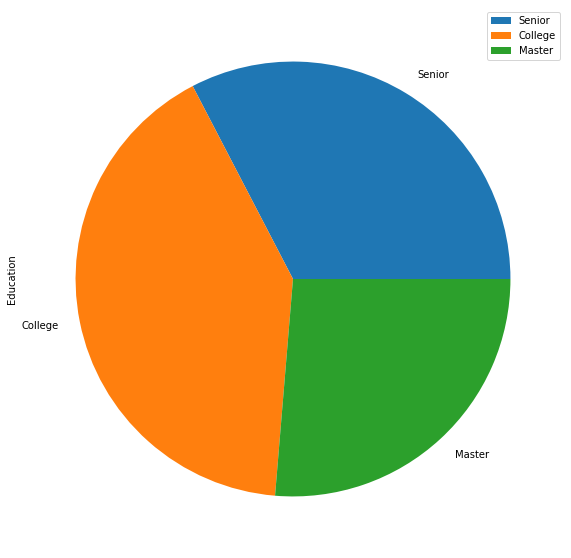

In [0]:
df.plot.pie(y='Education', figsize=(10, 10))

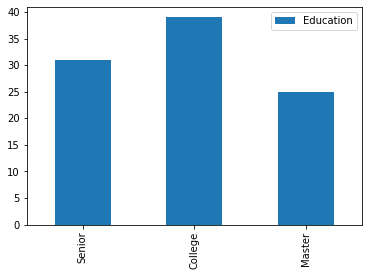

In [0]:
# 利用直方圖顯示人數
df.plot.bar()

###c. 用盒鬚圖呈現不同教育程度的學生成績

In [0]:
# 以教育程度來組合資料表
grade = pd.DataFrame()
grade = pd.concat([grade, Senior.Grade], axis=1).fillna(np.nan)
grade = openedu.rename_columns(grade, {"Grade": "senior_grade"})

grade = pd.concat([grade, College.Grade], axis=1).fillna(np.nan)
grade = openedu.rename_columns(grade, {"Grade": "college_grade"})

grade = pd.concat([grade,Master.Grade], axis=1).fillna(np.nan)
grade = openedu.rename_columns(grade, {"Grade": "society_grade"})

grade

,senior_grade,college_grade,society_grade
0,NaN,0.79,NaN
1,NaN,NaN,0.38
2,NaN,0.96,NaN
3,NaN,0.16,NaN
4,NaN,NaN,0.00
...,...,...,...
90,NaN,NaN,0.40
91,NaN,NaN,0.94
92,NaN,0.01,NaN
93,0.02,NaN,NaN


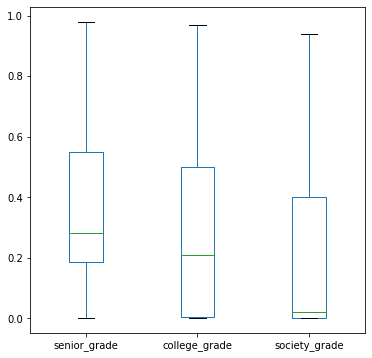

In [0]:
grade.plot.box(figsize=(6, 6))

###d. 呈現某一影片被觀看的時間長度變化

In [0]:
set(student_list[10].code)

{'EAo1LBY4sV8',
 'HetaAUNhWlM',
 'QhT-dpjbAns',
 'WDWApi3bySk',
 'h_AbNpAIMtw',
 nan,
 'xceCtT9ruBI'}

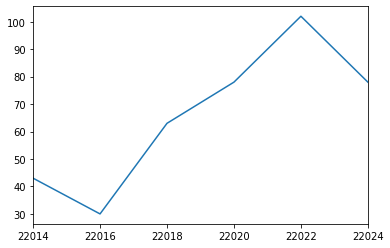

In [0]:
video_time = student_list[10][student_list[10].code == "HetaAUNhWlM"]
video_time = video_time[video_time.currentTime.notnull()].currentTime
video_time.plot.line()

### e.用點散圖呈現作答次數與最終成績之間的關係

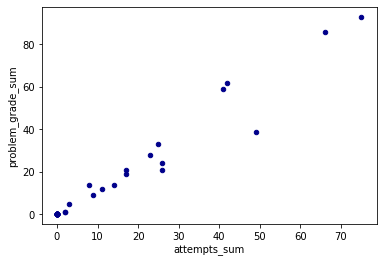

In [0]:

College.plot.scatter(x='attempts_sum', y='problem_grade_sum', c='DarkBlue')


###Lab 8 : 成績視覺化 

####Lab 8.1 : 利用直方圖顯示各教育程度成績小於 0.5 的人數

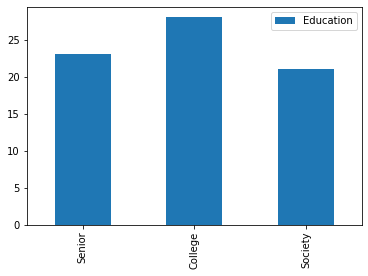

In [0]:
# Please write your code here
Senior_grade = Senior[Senior.Grade < 0.5]
College_grade = College[College.Grade < 0.5]
Master_grade = Master[Master.Grade < 0.5]

df = pd.DataFrame({'Education':[len(Senior_grade), len(College_grade), len(Master_grade)]},
                   index=["Senior", "College", "Society"])

df.plot.bar()


####Lab 8.2 : 使用盒鬚圖顯示各教育程度影片完看率小於 0.5 的成績分散狀況

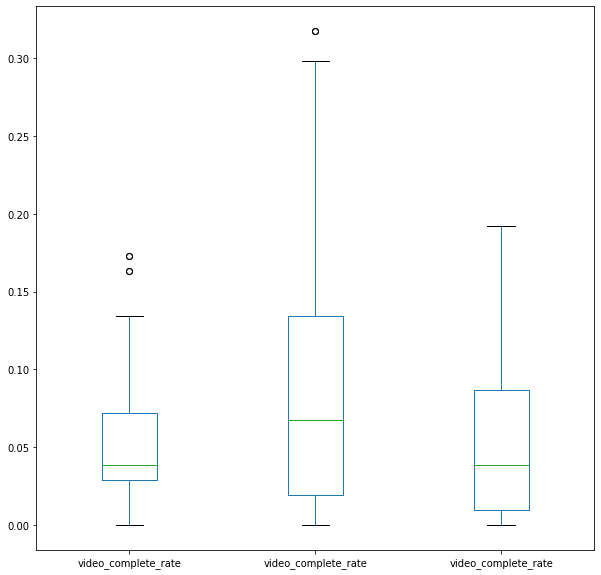

In [0]:
# Please write your code here
Senior_rate = Senior[Senior.video_complete_rate < 0.5]
College_rate = College[College.video_complete_rate < 0.5]
Master_rate = Master[Master.video_complete_rate < 0.5]

bad_grade = pd.DataFrame()
bad_grade = pd.concat([bad_grade, Senior_rate.video_complete_rate], axis=1).fillna(np.nan)
bad_grade = openedu.rename_columns(bad_grade, {"Grade": "senior_rate"})

bad_grade = pd.concat([bad_grade, College_rate.video_complete_rate], axis=1).fillna(np.nan)
bad_grade = openedu.rename_columns(bad_grade, {"Grade": "college_rate"})

bad_grade = pd.concat([bad_grade, Master_rate .video_complete_rate], axis=1).fillna(np.nan)
bad_grade = openedu.rename_columns(bad_grade, {"Grade": "society_rate"})

bad_grade.plot.box(figsize=(10, 10))

#五、統計分析

建立 analyzer 物件

In [0]:
analyzer = G38.getAnalyzer()

## Pearson analysis

皮爾森相關分析 (Pearson Correlation) 用於探討兩連續變數 (X, Y) 之間的線性相關，若兩變數之間的相關係數絕對值較大，則表示彼此相互共變的程度較大。主要藉由回傳的兩個值皮爾遜相關係數和 p-value 來判斷其關係。

**皮爾遜相關係數:**

皮爾遜相關係數測量兩個變量 X 和 Y 之間的線性相關性。所得係數的值介於 -1 和 1 之間，包括：

* 1：總正線性相關。

* 0：無線性相關，這兩個變量極有可能互不影響。

* -1：總負線性相關。

**p-value：**

什麼是 p-value？ p-value 是這兩個變量之間的相關性在統計上顯著的概率值。通常，我們選擇的顯著性水平為 0.05，這意味著我們有 95％ 的信心相信變量之間的相關性是顯著的。

當 p-value:
* **< 0.001**: 我們說有充分的證據表明相關性是顯著的。

* **< 0.05**: 有中等證據表明相關性顯著。

* **< 0.1**: 很少有證據表明相關性顯著。

* **> 0.1**: 沒有證據表明相關性顯著。

In [0]:
# 分析觀看次數與成績之間的關係
x = studentBehavior.data['video_watch_count']
y = studentBehavior.data['Grade']

analyzer.pearson(x, y)

The Pearson Correlation Coefficient is 0.48962461697630383  with a P-value of P =  4.7658696637818106e-07


### Lab 9 : 依據 Pearson correlation, **哪一個行為與成績的關聯最高？**

In [0]:
# Please write your code here
x1 = studentBehavior.data['video_watch_count']
x2 = studentBehavior.data['video_watch_time']
x3 = studentBehavior.data['complete_problem_number']
x4 = studentBehavior.data['login_count']
y = studentBehavior.data['Grade']
#		attempts_sum	problem_grade_sum	
analyzer.pearson(x1, y)

The Pearson Correlation Coefficient is 0.48962461697630383  with a P-value of P =  4.7658696637818106e-07


In [0]:
analyzer.pearson(x2, y)

The Pearson Correlation Coefficient is 0.5606864890754629  with a P-value of P =  3.4398692845919903e-09


In [0]:
analyzer.pearson(x3, y)

The Pearson Correlation Coefficient is 0.3626176542197171  with a P-value of P =  0.00030466700702160015


## T-test anaysis

T 檢定 (T-test) 的功能是比較兩平均數是否有顯著差異，並且告訴你有多顯著。主要藉由 T-Score 和 p-value 兩個數值來表達
* **T-Score:** 愈小代表兩群愈相似，T-Score 愈大代表兩群愈不一樣。
* **P-Value:** 愈小愈好，代表這個結果的產生是偶然的機率愈小。一般社會科學或是市調報告會用「信心水準」來描述 P-Value 的概念，在 95% 的信心水準下，代表是以 P-Value 為 0.05 為基準，而 0.05 也是一般常用的基準。

### a.比較大學和碩士間成績是否存在差異

In [0]:
analyzer.t_test(College.Grade, Master.Grade)

The T-tesr statistic is 1.1192722160864463  with a pvalue =  0.26734159138178615


### b.比較高中生和大學間成績是否存在差異

In [0]:
analyzer.t_test(Senior.Grade, College.Grade)

The T-tesr statistic is 0.8046588123464562  with a pvalue =  0.4238210256920024


### Lab : 比較男女間成績是否存在差異

In [0]:
grouped_gender = studentBehavior.data.groupby("gender")
group_male = grouped_gender.get_group('m')
group_female = grouped_gender.get_group('f')

analyzer.t_test(group_male.Grade, group_female.Grade)

The T-tesr statistic is 0.8703000597377583  with a pvalue =  0.38637730144738713


## ANOVA analysis

方差分析（ANOVA）是一種統計方法，用於檢驗兩個或多個組的均值之間是否存在顯著差異。通常藉由 F-test score 和 P-value 來表示兩個或多個組的均值之間的差異度。


*   **F-test score:** ANOVA 假設所有組的均值相同，計算實際均值偏離假設的程度，並將其報告為F檢驗分數。分數越大，意味著均值之間的差異就越大。
*   **P-value:** P 值表示我們計算出的得分值在統計上的重要性。如果我們的價格變量與我們正在分析的變量高度相關，則期望方差分析返回較大的 F 檢驗得分和較小的 p 值。

由於 ANOVA 分析相同變量的不同組之間的差異，因此 groupby 函數將派上用場。 由於 ANOVA 算法會自動對數據進行平均，因此我們無需事先進行平均。

### One way ANOVA

分析不同學歷，成績是否有顯著差異

In [0]:
studentBehavior.data = studentBehavior.data.replace(["高中","大學","碩士"],['senior','college','master'])

analyzer.ANOVA_one_way(studentBehavior.data, x="Education", y="Grade")

                sum_sq    df         F    PR(>F)
C(Education)  0.315416   2.0  1.626193  0.202279
Residual      8.922158  92.0       NaN       NaN


### Lab 10 : 學生的性別與觀看的時間是否有顯著差異？

In [0]:
# Please write your code here
analyzer.ANOVA_one_way(studentBehavior.data, x="gender", y="Grade")

             sum_sq    df         F    PR(>F)
C(gender)  0.074626   1.0  0.757422  0.386377
Residual   9.162949  93.0       NaN       NaN


#六、預測模型

##1.拆分訓練資料以及訓練資料

In [0]:
studentBehavior.data.columns

Index(['user_id', 'video_watch_count', 'video_complete_rate', 'login_count',
       'video_watch_time', 'attempts_sum', 'problem_grade_sum',
       'complete_problem_number', 'Grade', 'Education', 'gender', 'test'],
      dtype='object')

In [0]:
y_data = studentBehavior.data.test

# 預測時不吃 Boolean 所以轉成 0 1
y_data = y_data.astype('int')
x_data = studentBehavior.data.drop(['user_id', 'test', 'gender', 'Education','Grade'], axis=1)

x_data.columns

Index(['video_watch_count', 'video_complete_rate', 'login_count',
       'video_watch_time', 'attempts_sum', 'problem_grade_sum',
       'complete_problem_number'],
      dtype='object')

In [0]:
prediction = G38.getPrediction()
x_train, x_test, y_train, y_test = prediction.split_training_and_testing(x_data, y_data, test_size=0.3)

##2.SVM

In [0]:
prediction.svm(x_train, x_test, y_train, y_test)

============ SVM ============
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       1.00      0.67      0.80         6

    accuracy                           0.93        29
   macro avg       0.96      0.83      0.88        29
weighted avg       0.94      0.93      0.93        29



##3.Decision Tree

In [0]:
prediction.decision_tree(x_train, x_test, y_train, y_test)

============ decision tree ============
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        23
           1       0.33      0.33      0.33         6

    accuracy                           0.72        29
   macro avg       0.58      0.58      0.58        29
weighted avg       0.72      0.72      0.72        29



##4.Random forest

In [0]:
prediction.random_forest(x_train, x_test, y_train, y_test)

============ random forest ============
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        23
           1       0.67      0.67      0.67         6

    accuracy                           0.86        29
   macro avg       0.79      0.79      0.79        29
weighted avg       0.86      0.86      0.86        29

